In [1]:
import numpy as np
import pandas as pd

data_te=pd.read_csv('KDDTest+_2.csv')
data_te.head()


,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,10.1,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.2,1.3,neptune
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [2]:
import numpy as np
import pandas as pd

data_tr=pd.read_csv('KDDTrain+_2.csv')
data_tr.head()


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17.1,0.03,0.17.2,0.24,0.25,0.26,0.05,0.27,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [3]:
data_tr.shape

(125972, 42)

In [4]:
data_te.shape

(22543, 42)

In [5]:
import pandas as pd
import numpy as np
import sys
import sklearn
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)

0.23.4
1.15.4
3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]
0.19.2


In [6]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

# KDDTrain+_2.csv & KDDTest+_2.csv are the datafiles without the last column about the difficulty score
# these have already been removed.
df = pd.read_csv("KDDTrain+_2.csv", header=None, names = col_names)
df_test = pd.read_csv("KDDTest+_2.csv", header=None, names = col_names)

# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [7]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


In [9]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [10]:
# Test set
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [12]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#do same for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [13]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [14]:
enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)
# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_red_i',
 'service_http_8001',
 'service_http_2784',
 'service_harvest',
 'service_urh_i']

In [16]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

In [17]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [40]:
data=newdf[newdf['label']!=0]
print(data.shape)

(58630, 123)


In [41]:
mix_data = data.drop('label',1)
Y_mix_data = data.label
print(mix_data.shape)

(58630, 122)


In [42]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components =121
mix_data= pca.fit_transform(mix_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ",mix_data.shape)


shape of pca_reduced.shape =  (58630, 121)


In [43]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(mix_data)
mix_data_pre=scaler1.transform(mix_data) 

In [44]:
print(Y_mix_data.shape)

(58630,)


In [24]:
# take label column
labeldf=newdf['label']
labeldf_test=newdf_test['label']
# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [25]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]
DoS_df=newdf[~newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[~newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[~newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[~newdf['label'].isin(to_drop_U2R)];

#test
DoS_df_test=newdf_test[~newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[~newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[~newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[~newdf_test['label'].isin(to_drop_U2R)];
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


In [27]:
print(DoS_df.columns)

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=123)


In [26]:
print('Dimensions of DoS:' ,DoS_df.shape)

Dimensions of DoS: (113270, 123)


In [28]:
DoS_nor=DoS_df[(DoS_df['label'] == 0)]

In [29]:
DoS_normal = DoS_nor.drop('label',1)
Y_DoS_normal = DoS_nor.label
print(DoS_normal.shape)

(67343, 122)


In [30]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(DoS_normal)
X_DoS_normal=scaler1.transform(DoS_normal) 

In [31]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components =121
X_DoS_normal_data = pca.fit_transform(X_DoS_normal)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ",X_DoS_normal_data.shape)



shape of pca_reduced.shape =  (67343, 121)


In [32]:
# Split dataframes into X & Y
# assign X as a dataframe of feautures and Y as a series of outcome variables
X_DoS = DoS_df.drop('label',1)
Y_DoS = DoS_df.label
X_Probe = Probe_df.drop('label',1)
Y_Probe = Probe_df.label
X_R2L = R2L_df.drop('label',1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label',1)
Y_U2R = U2R_df.label
# test set
X_DoS_test = DoS_df_test.drop('label',1)
Y_DoS_test = DoS_df_test.label
X_Probe_test = Probe_df_test.drop('label',1)
Y_Probe_test = Probe_df_test.label
X_R2L_test = R2L_df_test.drop('label',1)
Y_R2L_test = R2L_df_test.label
X_U2R_test = U2R_df_test.drop('label',1)
Y_U2R_test = U2R_df_test.label

In [33]:
DoS_mal=DoS_df[(DoS_df['label'] == 1)]
X_DoS_mal= DoS_mal.drop('label',1)
Y_DoS_mal= DoS_mal.label

In [34]:

print(DoS_mal.shape)
print(Y_DoS_mal.shape)

(45927, 123)
(45927,)


In [35]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_DoS_mal)
X_DoS_mal=scaler1.transform(X_DoS_mal) 

In [36]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components =121
X_DoS_mal_data = pca.fit_transform(X_DoS_mal)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ",X_DoS_mal_data.shape)


shape of pca_reduced.shape =  (45927, 121)


In [57]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe) 
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L) 
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test) 

In [58]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components =121
X_DoS_data = pca.fit_transform(X_DoS)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ",X_DoS_data.shape)



shape of pca_reduced.shape =  (113270, 121)


In [45]:
w, h =58630,121;
matrix = [[0 for x in range(h)] for y in range(w)] 
print(len(matrix[0]),len(matrix))

121 58630


In [46]:
print(type(mix_data_pre))

<class 'numpy.ndarray'>


In [47]:
print(mix_data_pre.shape)

(58630, 121)


In [81]:
c=255*(X_DoS_mal_data[0] - np.min(X_DoS_mal_data[0]))/np.ptp(X_DoS_mal_data[0]).astype(int)


In [48]:
for i in range(0,58630):
    matrix[i]=np.round_(255*(mix_data_pre[i] - np.min(mix_data_pre[i]))/np.ptp(mix_data_pre[i]).astype(int),0)

In [59]:
print(type(matrix))

<class 'list'>


In [60]:
print(matrix[12])

[149. 149. 149. 151. 148. 150. 148. 149. 147. 148. 152. 149. 148. 150.
 150. 149. 150. 149. 148. 149. 149. 149. 149. 149. 151. 149. 150. 148.
 150. 149. 149. 149. 149. 149. 149. 151. 148. 150. 147. 149. 148. 149.
 149. 148. 149. 148. 150. 150. 147. 154. 150. 150. 151. 155. 150. 157.
 185. 135. 149. 133. 150. 152. 145. 149. 149. 149. 148. 148. 148. 148.
 149. 149. 148. 151. 149. 149. 149. 150. 149. 149. 150. 149. 149. 149.
 149. 149. 149. 149. 149. 149. 149. 149. 149. 149. 149. 149. 149. 149.
 149. 149. 149. 149. 149. 149. 149. 149. 149. 149. 149. 149. 149. 149.
  82. 258. 128.   0. 173. 137. 137. 149. 149.]


In [61]:
import numpy as geek
arr = geek.asarray(matrix) 

In [62]:

xt_u2r=arr[0:40000:]
yt_u2r=Y_mix_data [0:40000 :]
print(xt_u2r.shape)
print(yt_u2r.shape)


(40000, 121)
(40000,)


In [63]:
import numpy
numpy.savetxt("x_train_mix.csv",xt_u2r, delimiter=",")
import pandas as pd
df=pd.read_csv("x_train_mix.csv")
df.shape

(39999, 121)

In [64]:
import numpy
numpy.savetxt("y_train_mix.csv",yt_u2r, delimiter=",")
import pandas as pd
df1=pd.read_csv("y_train_mix.csv")
df1.shape

(39999, 1)

In [65]:
xt_u2r1=arr[40001:50000 :]
yt_u2r1=Y_mix_data[40001:50000 :]
print(xt_u2r1.shape)
print(yt_u2r1.shape)

(9999, 121)
(9999,)


In [66]:
import numpy
numpy.savetxt("x_test_mix.csv",xt_u2r1, delimiter=",")
import pandas as pd
df2=pd.read_csv("x_test_mix.csv")

In [67]:
import numpy
numpy.savetxt("y_test_mix.csv",yt_u2r1, delimiter=",")
import pandas as pd
df3=pd.read_csv("y_test_mix.csv")

In [68]:
print(arr[0])

[248. 248. 248. 247. 247. 247. 248. 247. 247. 248. 246. 247. 248. 248.
 247. 248. 248. 248. 248. 248. 248. 248. 247. 247. 247. 248. 248. 248.
 247. 248. 248. 248. 248. 248. 248. 248. 248. 247. 248. 248. 248. 248.
 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248.
 248. 248. 248. 247. 248. 248. 248. 248. 248. 248. 248. 247. 248. 248.
 248. 248. 248. 248. 247. 248. 248. 248. 248. 248. 248. 247. 248. 248.
 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248.
 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248. 248.
   0. 128. 175. 194. 228. 253. 256. 240. 247.]


In [55]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components =121
X_DoS_data = pca.fit_transform(X_DoS)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ",X_DoS_data.shape)



shape of pca_reduced.shape =  (113270, 121)


In [56]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components =121
X_Probe_data = pca.fit_transform(X_Probe)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ",X_Probe_data.shape)



shape of pca_reduced.shape =  (78999, 121)


In [57]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components =121
X_R2L_data = pca.fit_transform(X_R2L)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ",X_R2L_data.shape)



shape of pca_reduced.shape =  (68338, 121)


In [60]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components =122
X_U2R_data = pca.fit_transform(X_U2R)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ",X_U2R_data.shape)



shape of pca_reduced.shape =  (67395, 122)


In [61]:
print(X_U2R_data.shape)

(67395, 122)


In [62]:
print(X_Probe[0:1,0:])

[[-1.37662806e-01 -9.12233995e-03 -5.98880899e-03 -9.41363738e-03
   0.00000000e+00 -7.95587497e-03 -9.23002976e-02 -2.56604688e-02
  -1.24238237e+00 -1.43011196e-02 -4.16798733e-02 -3.07010256e-02
  -1.55784962e-02 -3.18077630e-02 -2.17505132e-02 -5.12351860e-02
   0.00000000e+00 -3.55788537e-03 -1.05769561e-01 -3.55000164e-01
  -4.12178328e-01 -1.67772979e-01 -1.48908397e-01 -3.44712733e-01
  -3.43283083e-01  3.03260809e-01 -2.80997653e-01 -4.86061277e-01
   2.77195459e-02 -1.38768890e+00 -1.52488374e+00 -2.71496772e-01
  -8.73275298e-02 -3.63844400e-01 -1.80498364e-01 -1.22180729e-01
  -1.74720285e-01 -3.49349090e-01 -2.72052649e-01  5.73301408e-01
  -4.66072049e-01 -4.87107290e-02 -3.04124483e-02 -1.18009178e-02
  -5.03164159e-03 -5.65696200e-02 -1.18009178e-02 -1.00636654e-02
  -1.23257346e-02 -1.77921297e-02 -1.50964537e-02 -1.50964537e-02
  -2.77985317e-02 -3.59537158e-01 -1.50964537e-02 -2.48251921e-01
  -5.43886858e-02 -9.41363738e-03 -1.06741966e-02 -8.74088446e-02
  -1.10326

In [32]:
X_Probe.std(axis=0);
X_R2L.std(axis=0);
X_U2R.std(axis=0);

In [63]:
print(type(X_Probe))

<class 'numpy.ndarray'>


In [64]:
X_DoS_round_off_values = np.round_(X_DoS_data,2) 
X_Probe_round_off_values = np.round_(X_Probe_data,2)
X_R2L_round_off_values = np.round_(X_R2L_data,2)
X_U2R_round_off_values = np.round_(X_U2R_data,2)

In [66]:
print(X_U2R_round_off_values[:1,0:])

[[-0.66  0.84  1.96 -0.76 -0.01 -0.18 -0.97  0.84 -1.52 -0.4   0.29  1.47
   0.79  2.28 -1.24  0.66 -0.61  0.05  0.55  0.01 -0.33 -0.09 -0.16 -0.11
  -0.07 -0.04  0.01  0.02  0.02  0.04  0.02 -0.01 -0.    0.01 -0.11 -0.62
  -0.29  0.82  0.01  0.06  0.39  0.38 -0.32 -0.56 -0.21 -0.64 -0.17 -0.38
  -0.21  0.05 -0.28  0.07  0.37 -0.21 -0.23 -0.52  0.11  0.16 -0.37  0.14
  -0.25  0.05 -0.05  0.34  1.16  0.1  -0.09 -0.07  0.04  0.02 -0.    0.
   0.   -0.   -0.   -0.    0.    0.   -0.    0.    0.    0.   -0.    0.
  -0.   -0.   -0.    0.   -0.    0.    0.    0.   -0.    0.    0.    0.
  -0.    0.    0.   -0.    0.   -0.   -0.   -0.   -0.    0.   -0.    0.
   0.   -0.    0.   -0.   -0.    0.    0.    0.    0.    0.    0.   -0.
  -0.    0.  ]]


In [67]:
X_DoS_SP = 100*np.array(X_DoS_round_off_values)
X_Probe_SP = 100*np.array(X_Probe_round_off_values)
X_R2L_SP = 100*np.array(X_R2L_round_off_values)
X_U2R_SP = 100*np.array(X_U2R_round_off_values)

In [68]:
X_DoS_SP=X_DoS_SP + 128
X_Probe_SP=X_Probe_SP + 128
X_R2L_SP=X_R2L_SP + 128
X_U2R_SP=X_U2R_SP + 128

In [69]:
X_DoS_SP[X_DoS_SP > 255] = 255
X_Probe_SP[X_Probe_SP > 255] = 255
X_R2L_SP[X_R2L_SP > 255] = 255
X_U2R_SP[X_U2R_SP > 20] =255

In [70]:
X_DoS_SP[X_DoS_SP <0] =0 
X_Probe_SP[X_Probe_SP<0] =0
X_R2L_SP[X_R2L_SP <0] = 0
X_U2R_SP[X_U2R_SP <0] =0

In [71]:
X_DoS_SP.shape

(113270, 121)

In [72]:
X_Probe_SP.shape

(78999, 121)

In [73]:
X_R2L_SP.shape

(68338, 121)

In [74]:
X_U2R_SP.shape

(67395, 122)

In [83]:
print(X_U2R_SP[10])

[255. 255. 255. 255. 255. 255. 255. 255.   0.   0.   0.   0. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255.   0. 255. 255. 255. 255. 255. 255.
 255. 255. 255.   0. 255. 255. 255.   0. 255. 255. 255. 255.   0. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]


In [75]:
x_dos=X_DoS_SP[0:10000 :]
y_dos=Y_DoS[0:10000 :]

In [70]:
import numpy
numpy.savetxt("x_train.csv",x_dos, delimiter=",")
import pandas as pd
df=pd.read_csv("x_train.csv")

In [71]:
import numpy
numpy.savetxt("y_train.csv",y_dos, delimiter=",")
import pandas as pd
df1=pd.read_csv("y_train.csv")

In [79]:
xt_dos=X_DoS_SP[10005:15005 :]
yt_dos=Y_DoS[10005:15005 :]
print(xt_dos.shape)
print(yt_dos.shape)

(5000, 121)
(5000,)


In [83]:
import numpy
numpy.savetxt("x_test.csv",xt_dos, delimiter=",")
import pandas as pd
df=pd.read_csv("x_test.csv")

In [84]:
import numpy
numpy.savetxt("y_test.csv",yt_dos, delimiter=",")
import pandas as pd
df=pd.read_csv("y_test.csv")

In [73]:
df.head(2)

,2.900000000000000000e+01,1.060000000000000000e+02,1.180000000000000000e+02,1.630000000000000000e+02,4.600000000000000000e+01,7.700000000000000000e+01,2.600000000000000000e+01,2.090000000000000000e+02,1.870000000000000000e+02,1.470000000000000000e+02,...,1.280000000000000000e+02.31,1.280000000000000000e+02.32,1.280000000000000000e+02.33,1.280000000000000000e+02.34,1.280000000000000000e+02.35,1.280000000000000000e+02.36,1.280000000000000000e+02.37,1.280000000000000000e+02.38,1.280000000000000000e+02.39,1.280000000000000000e+02.40
0,102.0,70.0,255.0,255.0,0.0,0.0,0.0,255.0,84.0,0.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
1,255.0,24.0,80.0,114.0,145.0,112.0,148.0,137.0,121.0,102.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0


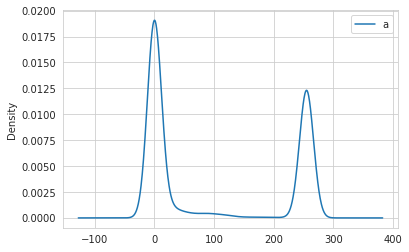

In [135]:
ax = df.plot.kde()

In [136]:
ax= np.genfromtxt("file_u2r.csv", delimiter=",", skip_header=1)

In [137]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt



In [138]:
stats.kstest(ax, 'norm')

KstestResult(statistic=0.7888219359042037, pvalue=0.0)

In [106]:
x_u3r=X_U2R_SP[:20000,:]

In [107]:
x_u3r.shape

(20000, 1)

In [46]:
print(X_DoS_SP)

[[ 29. 106. 118. ... 128. 128. 128.]
 [102.  70. 255. ... 128. 128. 128.]
 [255.  24.  80. ... 128. 128. 128.]
 ...
 [ 41.  67.  36. ... 128. 128. 128.]
 [255.  27.  71. ... 128. 128. 128.]
 [  0.  77.  88. ... 128. 128. 128.]]


In [72]:
import numpy
numpy.savetxt("fooo.csv",x_u3r, delimiter=",")

In [77]:
import numpy as np
from PIL import Image
import os
if not os.path.exists("data"):
    os.makedirs("data")
path="data/"
i=1
for row in X_DoS_SP:
    array=row.reshape(11,11)
    array = array.astype(np.uint8)
    img = Image.fromarray(array)
    img.save(path+"D-img"+str(i)+".png")
    i+=1

KeyboardInterrupt: 

In [ ]:
import numpy as np
from PIL import Image
import os
if not os.path.exists("X_Probe_IMG"):
    os.makedirs("X_Probe_IMG")
path="X_Probe_IMG/"
i=1
for row in SP:
    array=row.reshape(11,11)
    array = array.astype(np.uint8)
    img = Image.fromarray(array)
    img.save(path+"P-img"+str(i)+".png")
    i+=1

In [ ]:
import numpy as np
from PIL import Image
import os
if not os.path.exists("X_R2L_IMG"):
    os.makedirs("X_R2L_IMG")
path="X_R2L_IMG/"
i=1
for row in SP:
    array=row.reshape(11,11)
    array = array.astype(np.uint8)
    img = Image.fromarray(array)
    img.save(path+"R-img"+str(i)+".png")
    i+=1

In [ ]:
import numpy as np
from PIL import Image
import os
if not os.path.exists("X_U2R_IMG"):
    os.makedirs("X_U2R_IMG")
path="X_U2R_IMG/"
i=1
for row in SP:
    array=row.reshape(11,11)
    array = array.astype(np.uint8)
    img = Image.fromarray(array)
    img.save(path+"U-img"+str(i)+".png")
    i+=1

In [73]:
import pandas as pd
df=pd.read_csv("fooo.csv")

In [74]:
df.shape

(19999, 121)

In [75]:
df.head(5)

,6.200000000000000000e+01,2.120000000000000000e+02,2.550000000000000000e+02,5.200000000000000000e+01,1.270000000000000000e+02,1.100000000000000000e+02,3.100000000000000000e+01,2.120000000000000000e+02.1,0.000000000000000000e+00,8.800000000000000000e+01,...,1.280000000000000000e+02.42,1.280000000000000000e+02.43,1.280000000000000000e+02.44,1.280000000000000000e+02.45,1.280000000000000000e+02.46,1.280000000000000000e+02.47,1.280000000000000000e+02.48,1.280000000000000000e+02.49,1.280000000000000000e+02.50,1.280000000000000000e+02.51
0,0.0,255.0,255.0,0.0,111.0,0.0,0.0,255.0,255.0,201.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
1,213.0,0.0,144.0,255.0,0.0,114.0,170.0,149.0,226.0,88.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
2,123.0,0.0,50.0,134.0,145.0,119.0,144.0,83.0,173.0,116.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
3,195.0,0.0,118.0,104.0,148.0,92.0,121.0,144.0,163.0,130.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0
4,181.0,0.0,100.0,157.0,97.0,107.0,146.0,122.0,185.0,120.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0


In [93]:
array = np.genfromtxt("file_u2r.csv", delimiter=",", skip_header=1)

In [95]:
print(array)

[[-3.63650426  5.87036502]
 [ 0.85306585 -1.76359551]
 [-0.05033049 -1.57636517]
 ...
 [-1.97778113  1.59778614]
 [-0.66932541 -0.1015955 ]
 [-0.73658983 -0.07502876]]


In [76]:
numpy_array = np.genfromtxt("fooo.csv", delimiter=",", skip_header=1)

In [78]:
numpy_array.shape

(19999, 121)

In [79]:
print(numpy_array)

[[  0. 255. 255. ... 128. 128. 128.]
 [213.   0. 144. ... 128. 128. 128.]
 [123.   0.  50. ... 128. 128. 128.]
 ...
 [111.  49. 255. ... 128. 128. 128.]
 [126.  12. 208. ... 128. 128. 128.]
 [  0. 255.   0. ... 128. 128. 128.]]
